In [1]:
#importera libraries
from pandas import *
import numpy
from numpy import transpose
import matplotlib.pyplot as plt
%pylab inline
from queue import PriorityQueue

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\janss\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['array', 'unique']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(17, 17)


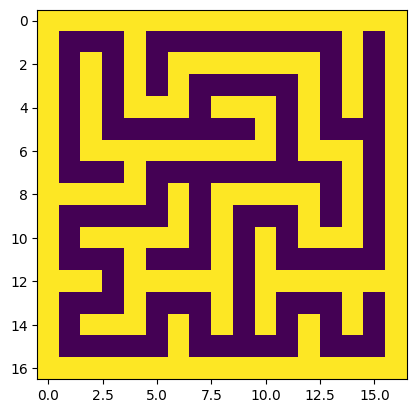

In [2]:
def make_maze(w, h): #Skapa maze
    # Initialisera maze grid
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]

    #Funktion för att gå igenom maze
    def walk(x, y):
        vis[y][x] = 1

        # Definiera alla möjliga drag (vänster, höäfer, upp, ner) och blanda dem
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        #Iterera igenom dem blandade dragen
        for (xx, yy) in d: #Kolla ifall draget är giltigt (inte draget)
            if vis[yy][xx]: continue 
            if xx == x: hor[max(y, yy)][x] = "10" # Uppdatera väggarna baserat på det aktuella draget
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)

    walk(numpy.random.randint(w), numpy.random.randint(h))

    #Konvertera maze till en binary mattix
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])

    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M

#Generera maze och visa den
maze=numpy.array(make_maze(8,8))
imshow(maze)

print(maze.shape)

In [3]:
#funktion för att få alla närliggande cells för en vald cell i maze 
def get_neighbors(x,y):
    neighbors=[] #En lista där vi kastar in alla närliggabde celler 
    #Initera listor för ändringar i x och y för att representera varje riktning (vänser, höger, upp, ner)
    xm=[0, 1, 0, -1]
    ym=[1, 0, -1, 0]
     #Loopa igenom varje riktning och lägga till koordinater av de närliggande celler i den riktning
    for i in range(4):
        neighbors.append((x+xm[i],y+ym[i]))
    return neighbors 

In [4]:
startLocation=[1,1] #Där maze börjar, 1,1
targetLocation=[15,15] #Där maze slutar, 15,15

In [5]:
def distance(a, b):#För att beräkna manhattan - avståndet mellan 2 punkter
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [6]:
#våran A* algoritm
def AStar(maze, startLocation, targetLocation):
   explored = [] #lista över alla utforskade noder
   frontier = PriorityQueue() #Prioriterskö för att hantera noder i ordning av prioritet
   queue_data = (0, startLocation) #Startnoden med prioritet 0
   frontier.put(queue_data)
   while not frontier.empty():
      current_node = frontier.get()[1] #Hämta noden som har lägst prioritet från kön

      if tuple(current_node) == tuple(targetLocation):
         break #Avsluta loopen om målet är nådd

      #Loopa igenom grann noderna till den nuvarande noden
      for next_node in get_neighbors(current_node[0], current_node[1]):
         if maze[next_node[0]][next_node[1]] == 0:
            if next_node not in explored: #Kontrollera att grann noden inte har utforskats tidigare
               priority = distance(targetLocation, next_node) #Beräkna prioritet för grann noden baserat på avstånd till målet
               node_data = (priority, next_node)
               frontier.put(node_data) #Lägga till grann noden i kön med dess prioritet
               explored.append(next_node) #Lägga till grann noden i listan över utforskade noder
   return explored

([[15, 15],
  [15, 14],
  [15, 13],
  [15, 12],
  [15, 11],
  [15, 10],
  [15, 9],
  [14, 9],
  [13, 9],
  [13, 8],
  [13, 7],
  [13, 6],
  [13, 5],
  [13, 4],
  [13, 3],
  [12, 3],
  [11, 3],
  [11, 2],
  [11, 1],
  [10, 1],
  [9, 1],
  [8, 1],
  [7, 1],
  [6, 1],
  [5, 1],
  [5, 2],
  [5, 3],
  [5, 4],
  [5, 5],
  [6, 5],
  [7, 5],
  [8, 5],
  [9, 5],
  [9, 6],
  [9, 7],
  [8, 7],
  [7, 7],
  [6, 7],
  [5, 7],
  [4, 7],
  [3, 7],
  [3, 6],
  [3, 5],
  [3, 4],
  [3, 3],
  [3, 2],
  [3, 1],
  [2, 1]],
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
     

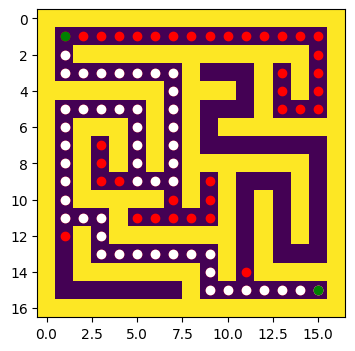

In [9]:
#funktion för att rita upp våran maze med A* algoritmen
def draw_maze(maze, startLocation, targetLocation, w, h):
    path =[] #lagra sökvägen
    current_node = targetLocation #Börja från början
    explored = AStar(maze, startLocation, targetLocation) #Använd A* för att utorska labyrinten

    #Skapa en figur och axel för att rita maze
    figure, ax = plt.subplots(figsize=((w / 2), (h / 2)))

    #Loopa tills nuvarande nod är startnoden
    while current_node != list(startLocation):
        indices=[]
        path.append(list(current_node)) #Lägga till nuvarande nod i sökvägen
        neighbors = get_neighbors(current_node[0], current_node[1]) #hämta grann noder

        #Om startnoden finns bland grannarna, avsluta loopen
        if startLocation in neighbors:
            break
        # Loopa igenom grann noderna och hitta deras index i explored
        for nb in neighbors:
            if nb in explored:
                indices.append(explored.index(nb))

        current_node=explored[min(indices)]

    ax.grid(False)
    plt.imshow(maze) # Visa labyrinten
    plt.plot(transpose(explored)[1],transpose(explored)[0],'or') # Markera utforskade noder med röda cirklar
    plt.plot(transpose(path)[1],transpose(path)[0],'ow') # Markera sökvägen med vita cirklar
    plt.plot(transpose(targetLocation)[1], transpose(targetLocation)[0], 'og')  # Markera målnoden med grön cirkel
    plt.plot(transpose(startLocation)[1], transpose(startLocation)[0], 'og')  # Markera startnoden med grön cirkel
    return path, maze, explored

maze = numpy.array(make_maze(8, 8))
draw_maze(maze, tuple(startLocation), tuple(targetLocation), 8, 8)